#What I am going to do here
## Make Small dataset
First I am making small sized dataset so that I can itrate faster in model making process process 

## Models I am going to use 
### Machine Learning
1.   Logistic Regression

### Deep Learning


1.   Small 5 Layer CNN without dropout or L2_regularization
2.   Larger 9 layer CNN without dropout or L2_regularization
3.   Larger 9 layer CNN with dropout ( with rates = [0.2 -- > 0.5 --> 0.14])
4.   Transfer Learning Technique with VGG16

## Further Process
After finding the best model for small dataset I will traind it on the complete dataset and evaluate the final result.




# Making Small Dataset

In [0]:
#!rm -r data_small

In [0]:
import os 
from matplotlib import pyplot as plt
import numpy as np
import keras
from keras import models,layers
from keras.preprocessing.image import ImageDataGenerator
import shutil
import sys


Using TensorFlow backend.


In [0]:
base_dir = 'data_small'
os.mkdir(base_dir)
data_dir = 'data'

train_dir = os.path.join(base_dir,'train')
os.mkdir(train_dir)
valid_dir = os.path.join(base_dir,'valid')
os.mkdir(valid_dir)
test_dir = os.path.join(base_dir,'test')
os.mkdir(test_dir)
  

In [0]:
for letter in os.listdir(data_dir):
  letter_dir = os.path.join(data_dir,letter)
  fnames = os.listdir(letter_dir)[0:300]      #gives random elements from list
  new_path = os.path.join(train_dir,letter)
  if not os.path.exists(new_path):
    os.mkdir(new_path)
  for fname in fnames:
    file_path = os.path.join(letter_dir,fname)
    new_file_path = os.path.join(new_path,fname)
    shutil.copy(file_path,new_file_path)

In [0]:
for letter in os.listdir(data_dir):
  letter_dir = os.path.join(data_dir,letter)
  fnames = os.listdir(letter_dir)[300:450]      #gives random elements from list
  new_path = os.path.join(valid_dir,letter)
  if not os.path.exists(new_path):
    os.mkdir(new_path)
  for fname in fnames:
    file_path = os.path.join(letter_dir,fname)
    new_file_path = os.path.join(new_path,fname)
    shutil.copy(file_path,new_file_path)

In [0]:
for letter in os.listdir(data_dir):
  letter_dir = os.path.join(data_dir,letter)
  fnames = os.listdir(letter_dir)[-150:]      #gives random elements from list
  new_path = os.path.join(test_dir,letter)
  if not os.path.exists(new_path):
    os.mkdir(new_path)
  for fname in fnames:
    file_path = os.path.join(letter_dir,fname)
    new_file_path = os.path.join(new_path,fname)
    shutil.copy(file_path,new_file_path)

In [0]:
datagen = ImageDataGenerator(rescale=1./255)


In [0]:
train_data = datagen.flow_from_directory(train_dir,target_size=(224,224),batch_size=64)
valid_data = datagen.flow_from_directory(valid_dir,target_size=(224,224),batch_size=64)
test_data = datagen.flow_from_directory(test_dir,target_size=(224,224),batch_size=64)

Found 7200 images belonging to 24 classes.
Found 3600 images belonging to 24 classes.
Found 3600 images belonging to 24 classes.


# Maxhine Learning
## Logistic Regression

In [0]:
model0 = models.Sequential()
model0.add(layers.Flatten(input_shape=(224,224,3)))
model0.add(layers.Dense(24,activation='softmax'))

In [0]:
model0.compile(loss='categorical_crossentropy',optimizer='sgd', metrics = ['acc'])

In [0]:
history = model0.fit_generator(train_data,
                     steps_per_epoch=7200//64,
                     validation_data=valid_data,
                     validation_steps=3600//64,
                     epochs=10)

Epoch 1/10
112/112 [==============================] - 17s 153ms/step - loss: 14.6967 - acc: 0.0658 - val_loss: 14.7612 - val_acc: 0.0803
Epoch 2/10
112/112 [==============================] - 15s 137ms/step - loss: 14.8353 - acc: 0.0766 - val_loss: 14.7473 - val_acc: 0.0834
Epoch 3/10
112/112 [==============================] - 17s 148ms/step - loss: 14.7693 - acc: 0.0811 - val_loss: 14.8814 - val_acc: 0.0659
Epoch 4/10
112/112 [==============================] - 15s 136ms/step - loss: 14.7865 - acc: 0.0801 - val_loss: 14.8155 - val_acc: 0.0792
Epoch 5/10
112/112 [==============================] - 15s 137ms/step - loss: 14.8067 - acc: 0.0794 - val_loss: 14.7934 - val_acc: 0.0798
Epoch 6/10
112/112 [==============================] - 15s 137ms/step - loss: 14.8244 - acc: 0.0783 - val_loss: 14.7393 - val_acc: 0.0812
Epoch 7/10
112/112 [==============================] - 15s 137ms/step - loss: 14.7715 - acc: 0.0822 - val_loss: 14.8104 - val_acc: 0.0786
Epoch 8/10
112/112 [=====================

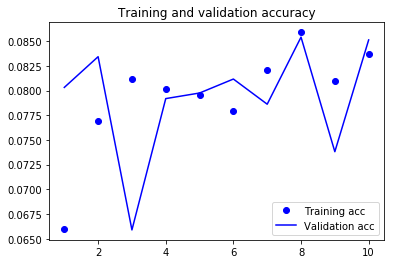

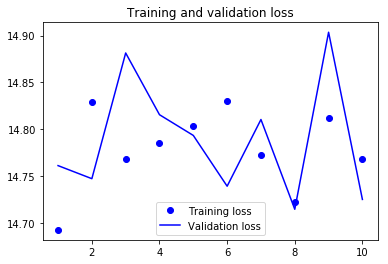

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
model0.evaluate_generator(test_data,steps=3600//64)

[14.790607085594765, 0.08088235294117647]

# Deep Learning 
## Small 5 Layer CNN without dropout

In [0]:
model1 = models.Sequential()

model1.add(layers.Conv2D(32,(5,5),activation='relu',input_shape=(224,224,3)))
model1.add(layers.MaxPooling2D((2,2)))
model1.add(layers.Conv2D(64,(5,5),activation='relu'))
model1.add(layers.MaxPooling2D((2,2)))
model1.add(layers.Conv2D(64,(5,5),activation='relu'))
model1.add(layers.MaxPooling2D((2,2)))
model1.add(layers.Conv2D(128,(5,5),activation='relu'))
model1.add(layers.MaxPooling2D((2,2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(24,activation='softmax'))

In [0]:
model1.compile(loss='categorical_crossentropy',optimizer='adam', metrics = ['acc'])

In [0]:
history = model0.fit_generator(train_data,
                     steps_per_epoch=7200//64,
                     validation_data=valid_data,
                     validation_steps=3600//64,
                     epochs=10)

Epoch 1/10
112/112 [==============================] - 18s 163ms/step - loss: 14.7610 - acc: 0.0840 - val_loss: 14.8474 - val_acc: 0.0775
Epoch 2/10
112/112 [==============================] - 15s 138ms/step - loss: 14.8012 - acc: 0.0816 - val_loss: 14.6982 - val_acc: 0.0857
Epoch 3/10
112/112 [==============================] - 17s 148ms/step - loss: 14.7737 - acc: 0.0834 - val_loss: 14.7967 - val_acc: 0.0809
Epoch 4/10
112/112 [==============================] - 15s 137ms/step - loss: 14.7742 - acc: 0.0831 - val_loss: 14.7858 - val_acc: 0.0812
Epoch 5/10
112/112 [==============================] - 15s 137ms/step - loss: 14.7582 - acc: 0.0843 - val_loss: 14.7902 - val_acc: 0.0809
Epoch 6/10
112/112 [==============================] - 16s 143ms/step - loss: 14.7782 - acc: 0.0831 - val_loss: 14.7599 - val_acc: 0.0823
Epoch 7/10
112/112 [==============================] - 15s 137ms/step - loss: 14.7310 - acc: 0.0861 - val_loss: 14.7271 - val_acc: 0.0848
Epoch 8/10
112/112 [=====================

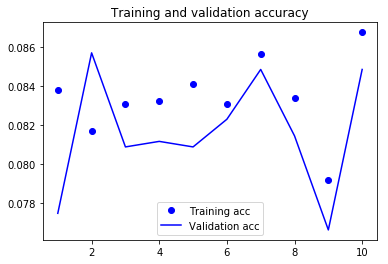

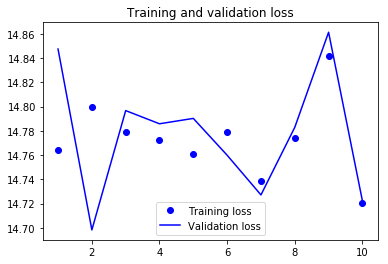

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
model1.evaluate_generator(test_data,steps=3600//64)

[3.1807854898375085, 0.02771493212669683]

## Larger 10 Layer Model

### Activation Function
I changed activation function from "relu" ---> ''tanh'' to check the difference in learning.

In [0]:
model2 = models.Sequential()

model2.add(layers.Conv2D(32,(3,3),activation='tanh',input_shape=(224,224,3)))
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.Conv2D(64,(3,3),activation='tanh'))
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.Conv2D(64,(3,3),activation='tanh'))
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.Conv2D(128,(3,3),activation='tanh'))
model2.add(layers.MaxPooling2D((2,2)))

model2.add(layers.Conv2D(64,(3,3),activation='tanh'))
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.Conv2D(128,(3,3),activation='tanh'))
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(128,activation='tanh'))
model2.add(layers.Dense(24,activation='softmax'))

In [0]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 52, 52, 64)        36928     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 24, 24, 128)       73856     
__________

In [0]:
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [0]:
valid_step = 3600//64
train_step = 7200//64
history = model2.fit_generator(train_data,
                     epochs=10,
                     steps_per_epoch=train_step,
                     validation_steps=valid_step,
                     validation_data=valid_data)

Epoch 1/10
112/112 [==============================] - 21s 186ms/step - loss: 2.0197 - acc: 0.4043 - val_loss: 1.0183 - val_acc: 0.7096
Epoch 2/10
112/112 [==============================] - 19s 172ms/step - loss: 0.6956 - acc: 0.8103 - val_loss: 0.5244 - val_acc: 0.8544
Epoch 3/10
112/112 [==============================] - 18s 162ms/step - loss: 0.3506 - acc: 0.9121 - val_loss: 0.2993 - val_acc: 0.9290
Epoch 4/10
112/112 [==============================] - 18s 162ms/step - loss: 0.1866 - acc: 0.9621 - val_loss: 0.2245 - val_acc: 0.9446
Epoch 5/10
112/112 [==============================] - 18s 162ms/step - loss: 0.1071 - acc: 0.9812 - val_loss: 0.1999 - val_acc: 0.9429
Epoch 6/10
112/112 [==============================] - 19s 172ms/step - loss: 0.0507 - acc: 0.9940 - val_loss: 0.1573 - val_acc: 0.9567
Epoch 7/10
112/112 [==============================] - 18s 164ms/step - loss: 0.0296 - acc: 0.9979 - val_loss: 0.1382 - val_acc: 0.9627
Epoch 8/10
112/112 [==============================] - 1

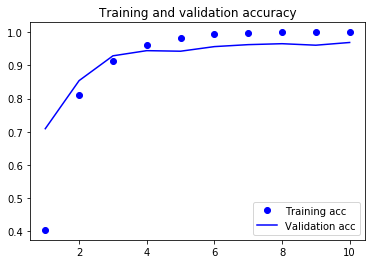

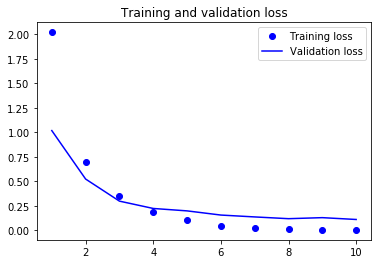

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

**Looks like Tanh works much better**


Let's test this model on Test Data

In [0]:
model2.evaluate_generator(test_data,steps=valid_step) # since valid_data & test_data sizes are equals  

[0.12941899306939117, 0.9642857142857143]

**Wow test accuracy is 96% looks like tanh worked great**

## Large model with Dropout
lets build the same model with dropout

In [0]:
"""
We have 6 Conv2D layers lets add DropOut to 3 of them
"""

model3 = models.Sequential()

model3.add(layers.Conv2D(32,(3,3),activation='tanh',input_shape=(224,224,3)))
model3.add(layers.MaxPooling2D((2,2)))
model3.add(layers.Conv2D(64,(3,3),activation='tanh'))
model3.add(layers.Dropout(rate=0.2)) # as 0.2 is always a good choice to start
model3.add(layers.MaxPooling2D((2,2)))
model3.add(layers.Conv2D(64,(3,3),activation='tanh'))
model3.add(layers.MaxPooling2D((2,2)))
model3.add(layers.Conv2D(128,(3,3),activation='tanh'))
model3.add(layers.Dropout(rate=0.2))
model3.add(layers.MaxPooling2D((2,2)))

model3.add(layers.Conv2D(64,(3,3),activation='tanh'))
model3.add(layers.MaxPooling2D((2,2)))
model3.add(layers.Conv2D(128,(3,3),activation='tanh'))
model3.add(layers.Dropout(rate=0.2))
model3.add(layers.MaxPooling2D((2,2)))
model3.add(layers.Flatten())
model3.add(layers.Dense(128,activation='tanh'))
model3.add(layers.Dense(24,activation='softmax'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model3.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [0]:
history = model3.fit_generator(train_data,
                     epochs=10,
                     steps_per_epoch=train_step,
                     validation_steps=valid_step,
                     validation_data=valid_data)

Epoch 1/10
112/112 [==============================] - 21s 190ms/step - loss: 2.3981 - acc: 0.2882 - val_loss: 1.4262 - val_acc: 0.5707
Epoch 2/10
112/112 [==============================] - 20s 176ms/step - loss: 0.9610 - acc: 0.7289 - val_loss: 0.8953 - val_acc: 0.7265
Epoch 3/10
112/112 [==============================] - 20s 182ms/step - loss: 0.5229 - acc: 0.8622 - val_loss: 0.8557 - val_acc: 0.7537
Epoch 4/10
112/112 [==============================] - 20s 175ms/step - loss: 0.3729 - acc: 0.8991 - val_loss: 0.6017 - val_acc: 0.8187
Epoch 5/10
112/112 [==============================] - 20s 175ms/step - loss: 0.2677 - acc: 0.9295 - val_loss: 0.7950 - val_acc: 0.7489
Epoch 6/10
112/112 [==============================] - 20s 175ms/step - loss: 0.1869 - acc: 0.9515 - val_loss: 0.6882 - val_acc: 0.7732
Epoch 7/10
112/112 [==============================] - 20s 183ms/step - loss: 0.1669 - acc: 0.9583 - val_loss: 0.9167 - val_acc: 0.7166
Epoch 8/10
112/112 [==============================] - 2

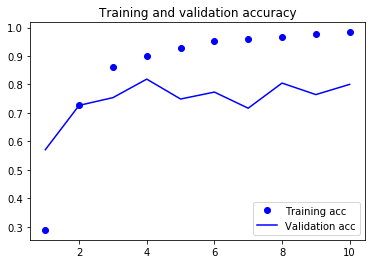

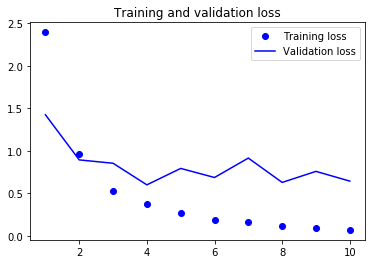

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

**Didn't work that good lets change dropout rate**

In [0]:
"""
Changing dropout rate 0.2 --> 0.5
"""

model3 = models.Sequential()

model3.add(layers.Conv2D(32,(3,3),activation='tanh',input_shape=(224,224,3)))
model3.add(layers.MaxPooling2D((2,2)))
model3.add(layers.Conv2D(64,(3,3),activation='tanh'))
model3.add(layers.Dropout(rate=0.5)) # 0.2 --> 0.5
model3.add(layers.MaxPooling2D((2,2)))
model3.add(layers.Conv2D(64,(3,3),activation='tanh'))
model3.add(layers.MaxPooling2D((2,2)))
model3.add(layers.Conv2D(128,(3,3),activation='tanh'))
model3.add(layers.Dropout(rate=0.5))
model3.add(layers.MaxPooling2D((2,2)))

model3.add(layers.Conv2D(64,(3,3),activation='tanh'))
model3.add(layers.MaxPooling2D((2,2)))
model3.add(layers.Conv2D(128,(3,3),activation='tanh'))
model3.add(layers.Dropout(rate=0.5))
model3.add(layers.MaxPooling2D((2,2)))
model3.add(layers.Flatten())
model3.add(layers.Dense(128,activation='tanh'))
model3.add(layers.Dense(24,activation='softmax'))

In [0]:
model3.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])
history = model3.fit_generator(train_data,
                     epochs=10,
                     steps_per_epoch=train_step,
                     validation_steps=valid_step,
                     validation_data=valid_data)

Epoch 1/10
112/112 [==============================] - 22s 192ms/step - loss: 2.5715 - acc: 0.2195 - val_loss: 1.7476 - val_acc: 0.4907
Epoch 2/10
112/112 [==============================] - 20s 175ms/step - loss: 1.2217 - acc: 0.6342 - val_loss: 1.2950 - val_acc: 0.6270
Epoch 3/10
112/112 [==============================] - 20s 175ms/step - loss: 0.7708 - acc: 0.7769 - val_loss: 1.3605 - val_acc: 0.6250
Epoch 4/10
112/112 [==============================] - 20s 179ms/step - loss: 0.5506 - acc: 0.8379 - val_loss: 1.4487 - val_acc: 0.5970
Epoch 5/10
112/112 [==============================] - 20s 175ms/step - loss: 0.4378 - acc: 0.8753 - val_loss: 1.2623 - val_acc: 0.6397
Epoch 6/10
112/112 [==============================] - 20s 174ms/step - loss: 0.3316 - acc: 0.9042 - val_loss: 1.5279 - val_acc: 0.5962
Epoch 7/10
112/112 [==============================] - 20s 174ms/step - loss: 0.3220 - acc: 0.9056 - val_loss: 1.7452 - val_acc: 0.5472
Epoch 8/10
112/112 [==============================] - 2

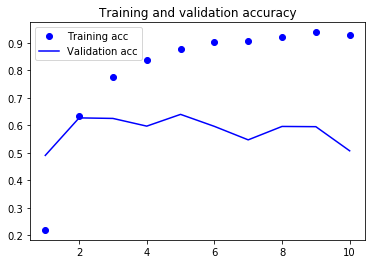

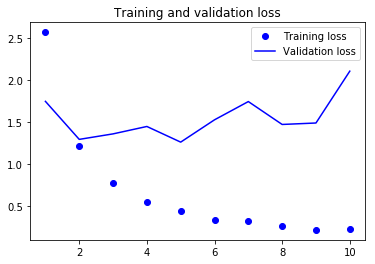

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

**Clearly it didn't work but lets check out on test data**

In [0]:
model3.evaluate_generator(test_data,steps=valid_step)

[2.0853606462478638, 0.5062217194570136]

**This worsen the performance**

**Lets try decreasing the dropout rate**

In [0]:
"""
Changing dropout rate 0.2 --> 0.14
"""

model3 = models.Sequential()

model3.add(layers.Conv2D(32,(3,3),activation='tanh',input_shape=(224,224,3)))
model3.add(layers.MaxPooling2D((2,2)))
model3.add(layers.Conv2D(64,(3,3),activation='tanh'))
model3.add(layers.Dropout(rate=0.14)) # 0.2 --> 0.14
model3.add(layers.MaxPooling2D((2,2)))
model3.add(layers.Conv2D(64,(3,3),activation='tanh'))
model3.add(layers.MaxPooling2D((2,2)))
model3.add(layers.Conv2D(128,(3,3),activation='tanh'))
model3.add(layers.Dropout(rate=0.14))
model3.add(layers.MaxPooling2D((2,2)))

model3.add(layers.Conv2D(64,(3,3),activation='tanh'))
model3.add(layers.MaxPooling2D((2,2)))
model3.add(layers.Conv2D(128,(3,3),activation='tanh'))
model3.add(layers.Dropout(rate=0.14))
model3.add(layers.MaxPooling2D((2,2)))
model3.add(layers.Flatten())
model3.add(layers.Dense(128,activation='tanh'))
model3.add(layers.Dense(24,activation='softmax'))

In [0]:
model3.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])
history = model3.fit_generator(train_data,
                     epochs=10,
                     steps_per_epoch=train_step,
                     validation_steps=valid_step,
                     validation_data=valid_data)

Epoch 1/10
112/112 [==============================] - 21s 189ms/step - loss: 2.2214 - acc: 0.3482 - val_loss: 1.2614 - val_acc: 0.6329
Epoch 2/10
112/112 [==============================] - 20s 176ms/step - loss: 0.8607 - acc: 0.7684 - val_loss: 0.9005 - val_acc: 0.7257
Epoch 3/10
112/112 [==============================] - 20s 177ms/step - loss: 0.5053 - acc: 0.8673 - val_loss: 0.6272 - val_acc: 0.8153
Epoch 4/10
112/112 [==============================] - 20s 178ms/step - loss: 0.2941 - acc: 0.9293 - val_loss: 0.5586 - val_acc: 0.8303
Epoch 5/10
112/112 [==============================] - 20s 175ms/step - loss: 0.2295 - acc: 0.9434 - val_loss: 0.4595 - val_acc: 0.8577
Epoch 6/10
112/112 [==============================] - 20s 175ms/step - loss: 0.1637 - acc: 0.9616 - val_loss: 0.4644 - val_acc: 0.8544
Epoch 7/10
112/112 [==============================] - 20s 175ms/step - loss: 0.1044 - acc: 0.9775 - val_loss: 0.4088 - val_acc: 0.8744
Epoch 8/10
112/112 [==============================] - 2

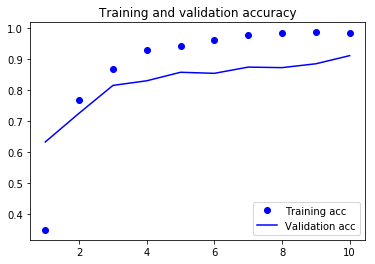

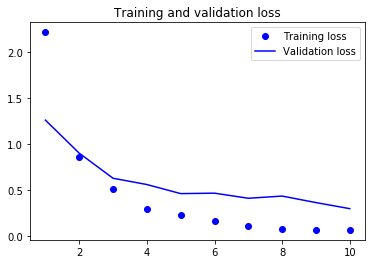

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

**This works much better lets test the test data**

In [0]:
model3.evaluate_generator(test_data,steps=valid_step)

[0.2661470328520866, 0.9205316742081447]

**The second best accuracy so far 92%**

# Now its time we check Transfer Learning with VGG16

In [0]:
from keras.applications import VGG16


In [0]:
conv_base = VGG16(weights = 'imagenet',
                  include_top = False,
                  input_shape = (224,224,3))
conv_base.summary()

58892288/58889256 [==============================] - 1s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool

In [0]:
conv_base.trainable = False   # so learned weights dont change

In [0]:
model4 = models.Sequential()
model4.add(conv_base)
model4.add(layers.Flatten())
model4.add(layers.Dense(512,activation='tanh'))
model4.add(layers.Dense(24,activation='softmax'))

In [0]:
model4.compile(loss='categorical_crossentropy',optimizer = 'adam',metrics=['acc'])

In [0]:
history = model4.fit_generator(train_data,
                               epochs=10,
                               steps_per_epoch=train_step,
                               validation_data=valid_data,
                               validation_steps=valid_step)

Epoch 1/10
112/112 [==============================] - 56s 497ms/step - loss: 3.1716 - acc: 0.0792 - val_loss: 3.0707 - val_acc: 0.0956
Epoch 2/10
112/112 [==============================] - 53s 469ms/step - loss: 2.9721 - acc: 0.1247 - val_loss: 2.9492 - val_acc: 0.1160
Epoch 3/10
112/112 [==============================] - 53s 475ms/step - loss: 2.8659 - acc: 0.1532 - val_loss: 2.8192 - val_acc: 0.1400
Epoch 4/10
112/112 [==============================] - 53s 473ms/step - loss: 2.7740 - acc: 0.1752 - val_loss: 2.7631 - val_acc: 0.1889
Epoch 5/10
112/112 [==============================] - 53s 474ms/step - loss: 2.7311 - acc: 0.1816 - val_loss: 2.7075 - val_acc: 0.1977
Epoch 6/10
112/112 [==============================] - 53s 472ms/step - loss: 2.6733 - acc: 0.2052 - val_loss: 2.7187 - val_acc: 0.1861
Epoch 7/10
112/112 [==============================] - 53s 474ms/step - loss: 2.6591 - acc: 0.2012 - val_loss: 2.6463 - val_acc: 0.2135
Epoch 8/10
112/112 [==============================] - 5

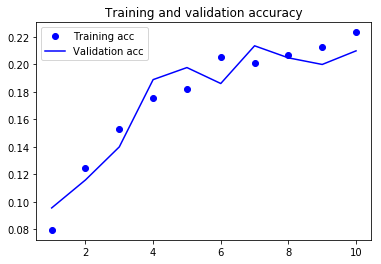

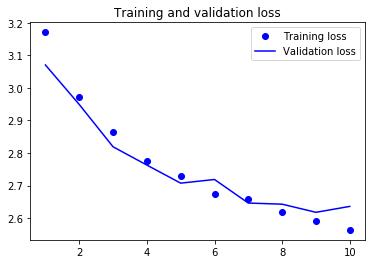

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

guess it is not the best model

### Save all models

In [0]:
model0.save('LogisticRegression.h5')
model1.save('CNN_5_layers_relu.h5')
model2.save('CNN_9_layers_tanh.h5')
model3.save('CNN_9_layers_tanh_dropout.h5')
model4.save('Transfer_learning_VGG16.h5')

# Train on full data
to train on complete data I will create seperate directories and move file instead of copying

In [0]:
base_dir = 'data_complete'
os.mkdir(base_dir)
data_dir = 'data'

train_dir = os.path.join(base_dir,'train')
os.mkdir(train_dir)
valid_dir = os.path.join(base_dir,'valid')
os.mkdir(valid_dir)
test_dir = os.path.join(base_dir,'test')
os.mkdir(test_dir)


In [0]:
for letter in os.listdir(data_dir):
  letter_dir = os.path.join(data_dir,letter)
  fnames = os.listdir(letter_dir)[0:-500]      #gives random elements from list
  new_path = os.path.join(train_dir,letter)
  if not os.path.exists(new_path):
    os.mkdir(new_path)
  for fname in fnames:
    file_path = os.path.join(letter_dir,fname)
    new_file_path = os.path.join(new_path,fname)
    shutil.move(file_path,new_file_path)

In [0]:
for letter in os.listdir(data_dir):
  letter_dir = os.path.join(data_dir,letter)
  fnames = os.listdir(letter_dir)[0:-250]      #gives random elements from list
  new_path = os.path.join(valid_dir,letter)
  if not os.path.exists(new_path):
    os.mkdir(new_path)
  for fname in fnames:
    file_path = os.path.join(letter_dir,fname)
    new_file_path = os.path.join(new_path,fname)
    shutil.move(file_path,new_file_path)

In [0]:
for letter in os.listdir(data_dir):
  letter_dir = os.path.join(data_dir,letter)
  fnames = os.listdir(letter_dir)      # to get all remaining 250 files
  new_path = os.path.join(test_dir,letter)
  if not os.path.exists(new_path):
    os.mkdir(new_path)
  for fname in fnames:
    file_path = os.path.join(letter_dir,fname)
    new_file_path = os.path.join(new_path,fname)
    shutil.move(file_path,new_file_path)

In [0]:
#checking if any file remain in data directory
for letter in os.listdir(data_dir):
  path = os.path.join(data_dir,letter)
  print("{} : {}".format(letter,len(os.listdir(path))))

l : 0
t : 0
b : 0
d : 0
i : 0
p : 0
o : 0
k : 0
c : 0
e : 0
f : 0
u : 0
q : 0
v : 0
w : 0
m : 0
n : 0
y : 0
a : 0
h : 0
x : 0
g : 0
r : 0
s : 0


**All Files Moved**

In [0]:
#generating Data for complete dataset
train_data = datagen.flow_from_directory(train_dir,target_size=(224,224),batch_size=64)
valid_data = datagen.flow_from_directory(valid_dir,target_size=(224,224),batch_size=64)
test_data = datagen.flow_from_directory(test_dir,target_size=(224,224),batch_size=64)

Found 53774 images belonging to 24 classes.
Found 6000 images belonging to 24 classes.
Found 6000 images belonging to 24 classes.


# Load the best model
## Loading CNN_9_layers_tanh.h5

In [0]:
model = models.load_model("CNN_9_layers_tanh.h5")

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 52, 52, 64)        36928     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 24, 24, 128)       73856     
__________

In [0]:
model.compile(loss='categorical_crossentropy',optimizer = 'adam', metrics=['acc'])

In [0]:
train_steps = 53774//64
test_steps = valid_steps = 6000//64
print("t",train_steps,'v',valid_steps)

t 840 v 93


In [0]:
history = model.fit_generator(train_data,
                              validation_data=valid_data,
                              epochs=16,
                              steps_per_epoch=train_steps,
                              validation_steps=valid_steps)

Epoch 1/16
840/840 [==============================] - 173s 206ms/step - loss: 0.0801 - acc: 0.9770 - val_loss: 0.1076 - val_acc: 0.9673
Epoch 2/16
840/840 [==============================] - 165s 196ms/step - loss: 0.0603 - acc: 0.9817 - val_loss: 0.0884 - val_acc: 0.9730
Epoch 3/16
840/840 [==============================] - 166s 197ms/step - loss: 0.0483 - acc: 0.9852 - val_loss: 0.0714 - val_acc: 0.9801
Epoch 4/16
840/840 [==============================] - 163s 194ms/step - loss: 0.0477 - acc: 0.9853 - val_loss: 0.0700 - val_acc: 0.9789
Epoch 5/16
840/840 [==============================] - 165s 196ms/step - loss: 0.0489 - acc: 0.9842 - val_loss: 0.0538 - val_acc: 0.9837
Epoch 6/16
840/840 [==============================] - 162s 193ms/step - loss: 0.0386 - acc: 0.9880 - val_loss: 0.0898 - val_acc: 0.9729
Epoch 7/16
840/840 [==============================] - 165s 196ms/step - loss: 0.0485 - acc: 0.9836 - val_loss: 0.0781 - val_acc: 0.9792
Epoch 8/16
840/840 [============================

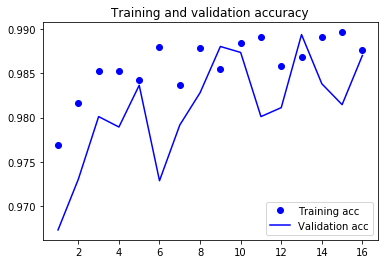

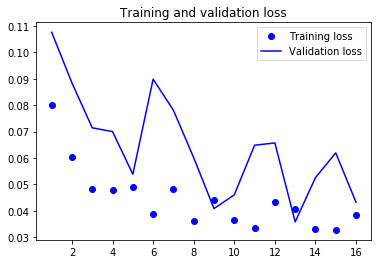

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
model.evaluate_generator(test_data,steps=test_steps)

[0.03966623473967556, 0.9867271505376344]

In [0]:
model.save("final_model.h5")

# Results

In [0]:
final_loss,final_acc = model.evaluate_generator(test_data,steps=test_steps)
loss0,acc0 = model0.evaluate_generator(test_data,steps=test_steps)
loss1,acc1 = model1.evaluate_generator(test_data,steps=test_steps)
loss2,acc2 = model2.evaluate_generator(test_data,steps=test_steps)
loss3,acc3 = model3.evaluate_generator(test_data,steps=test_steps)
loss4,acc4 = model4.evaluate_generator(test_data,steps=test_steps)

In [0]:
result_dict = {
    'Model Name' :['Logistic Regression','CNN 5 Layers','CNN 9 Layers','CNN 9 Layers dropout','VGG16','final_model',],
    'Activations':['None','relu','tanh','tanh','tanh','tanh',],
    'Output Activations':['softmax','softmax','softmax','softmax','softmax','softmax',],
    'Drouput':['None','None','None','0.14','None','None',],
    'Optimizer':['sgd','adam','adam','adam','adam','adam',],
    'Model Accuracy':[acc0,acc1,acc2,acc3,acc4,final_acc,],
    'Model Loss':[loss0,loss1,loss2,loss3,loss4,final_loss,],
    
}

In [0]:
import pandas as pd
results= pd.DataFrame(result_dict)

In [0]:
results = results.sort_values(by=['Model Accuracy'],ascending=False)

In [0]:
results.to_csv('results.csv')

In [0]:
results

,Model Name,Activations,Output Activations,Drouput,Optimizer,Model Accuracy,Model Loss
5,final_model,tanh,softmax,None,adam,0.986018,0.040327
2,CNN 9 Layers,tanh,softmax,None,adam,0.965970,0.125028
3,CNN 9 Layers dropout,tanh,softmax,0.14,adam,0.916611,0.273225
4,VGG16,tanh,softmax,None,adam,0.209063,2.603566
0,Logistic Regression,None,softmax,None,sgd,0.080863,14.801846
1,CNN 5 Layers,relu,softmax,None,adam,0.026112,3.181179


In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

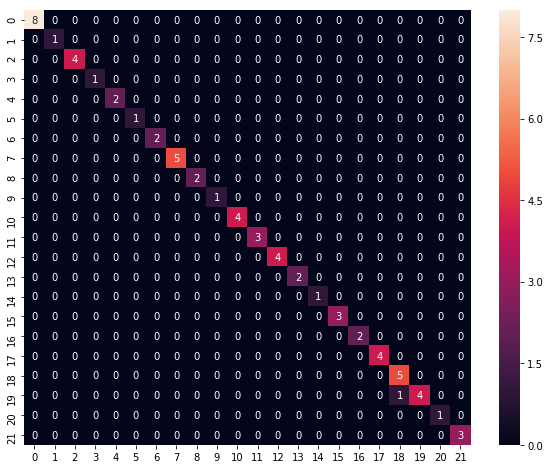

In [195]:
input_batch,label = test_data.next()
pred = model.predict(input_batch)

plt.figure(figsize=(10,8))
cm = confusion_matrix(label.argmax(axis=1),pred.argmax(axis=1))
sns.heatmap(cm,annot=True)